In [1]:
import pandas as pd

In [3]:
df = pd.read_csv(
    "/content/training.1600000.processed.noemoticon.csv.zip",
    encoding="latin-1",
    header=None
)


In [4]:
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
df.columns = ['target', 'id', 'date', 'flag', 'user', 'text']


In [7]:
df.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [8]:
df.shape


(1600000, 6)

In [9]:
df['target'].value_counts()

,count
target,
0,800000
4,800000


In [10]:
df['sentiment'] = df['target'].apply(
    lambda x: 'Negative' if x == 0 else 'Positive'
)

In [11]:
df[['text', 'sentiment']].head()

,text,sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",Negative
1,is upset that he can't update his Facebook by ...,Negative
2,@Kenichan I dived many times for the ball. Man...,Negative
3,my whole body feels itchy and like its on fire,Negative
4,"@nationwideclass no, it's not behaving at all....",Negative


In [12]:
df = df[['text', 'sentiment']]

In [13]:
df.head()
df.shape

(1600000, 2)

In [14]:
df_sample = df.sample(n=20000, random_state=42)

In [15]:
df_sample.shape

(20000, 2)

In [16]:
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [17]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'http\S+', '', text)        # remove URLs
    text = re.sub(r'@\w+', '', text)           # remove mentions
    text = re.sub(r'[^a-zA-Z]', ' ', text)     # remove special chars
    text = text.lower()                        # lowercase
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return ' '.join(words)

In [18]:
df_sample['clean_text'] = df_sample['text'].apply(clean_text)

In [19]:
df_sample[['text', 'clean_text', 'sentiment']].head()

,text,clean_text,sentiment
541200,@chrishasboobs AHHH I HOPE YOUR OK!!!,ahhh hope ok,Negative
750,"@misstoriblack cool , i have no tweet apps fo...",cool tweet apps razr,Negative
766711,@TiannaChaos i know just family drama. its la...,know family drama lame hey next time u hang ki...,Negative
285055,School email won't open and I have geography ...,school email open geography stuff revise stupi...,Negative
705995,upper airways problem,upper airways problem,Negative


In [20]:
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [21]:
sia = SentimentIntensityAnalyzer()

In [22]:
df_sample['sentiment_score'] = df_sample['clean_text'].apply(
    lambda x: sia.polarity_scores(x)['compound']
)

In [23]:
def vader_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df_sample['vader_sentiment'] = df_sample['sentiment_score'].apply(vader_sentiment)

In [24]:
df_sample[['clean_text', 'sentiment', 'vader_sentiment', 'sentiment_score']].head()

,clean_text,sentiment,vader_sentiment,sentiment_score
541200,ahhh hope ok,Negative,Positive,0.6249
750,cool tweet apps razr,Negative,Positive,0.3182
766711,know family drama lame hey next time u hang ki...,Negative,Negative,-0.4767
285055,school email open geography stuff revise stupi...,Negative,Negative,-0.5267
705995,upper airways problem,Negative,Negative,-0.4019


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

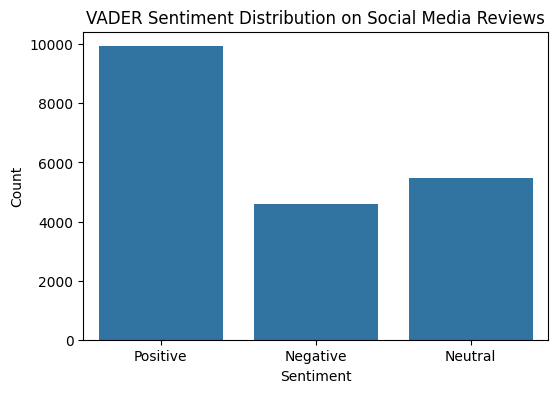

In [26]:
plt.figure(figsize=(6,4))
sns.countplot(x='vader_sentiment', data=df_sample)
plt.title("VADER Sentiment Distribution on Social Media Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [27]:
df_eval = df_sample[df_sample['vader_sentiment'] != 'Neutral']


In [28]:
df_eval['true_label'] = df_eval['sentiment'].map({'Positive': 1, 'Negative': 0})
df_eval['pred_label'] = df_eval['vader_sentiment'].map({'Positive': 1, 'Negative': 0})


/tmp/ipython-input-3921499279.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eval['true_label'] = df_eval['sentiment'].map({'Positive': 1, 'Negative': 0})
/tmp/ipython-input-3921499279.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eval['pred_label'] = df_eval['vader_sentiment'].map({'Positive': 1, 'Negative': 0})


In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [30]:
accuracy = accuracy_score(df_eval['true_label'], df_eval['pred_label'])
accuracy

0.6959213150835684

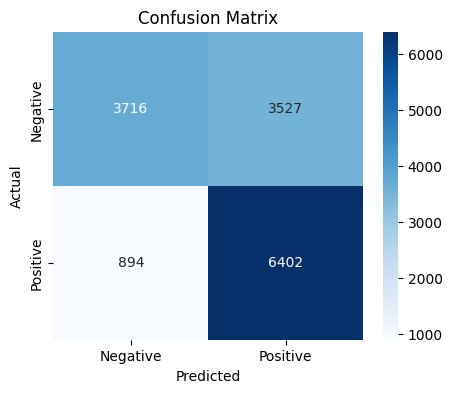

In [31]:
cm = confusion_matrix(df_eval['true_label'], df_eval['pred_label'])

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [32]:
print(classification_report(df_eval['true_label'], df_eval['pred_label']))


              precision    recall  f1-score   support

           0       0.81      0.51      0.63      7243
           1       0.64      0.88      0.74      7296

    accuracy                           0.70     14539
   macro avg       0.73      0.70      0.69     14539
weighted avg       0.73      0.70      0.69     14539

